<a href="https://colab.research.google.com/github/Kururoll/predicciones-de-ventas/blob/main/predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
filename = "/content/sales_predictions_2023.csv"
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Pregunta 1
8523 filas y 12 columnas

##Pregunta 2
Son Objetos, Flotantes y un Entero

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Pregunta 3
al parecer, no habrian duplicados

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Pregunta 4
Faltan 1463 datos en la columna Item_Weight y 2410 datos en la columna Outlet_Size

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Pregunta 5
Para el caso de Item_Weight, calcule un promedio por codigo identificador (que deberia ser unico para cada producto) y luego rellene los valores vacios con el promedio por identificador, lo que restas son 4 registros con NaN, por lo que elimine esos 4 registros.

Para el caso del Outlet_Size
realizo un groupby de Outlet_Type con Outlet_Size para ver el cruce de informacion. Luego, sumo los valores NA por Outlet_Type cruzaod con Outlet_Size para comparar con el groupby realizado anteriormente, con esto me percato de que toda Grocery Store es Outlet_Size Small, por lo que procedo a rellenar los nulos entre ambos cruces (Grocery Store = Small) Luego de realizar varios cruces mas por las columnas de Outlet, me di cuenta que los datos faltantes pertenecen a Tier 2 de Outlet_Location_Type, por lo que rellene los valores con "Small" ya que es el valor que mas se repite en Tier 2 con valores.

In [ ]:
#Primero Item_Weight.

promedio = df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
df['Item_Weight'].fillna(promedio, inplace=True)

#con esto, ya quedan solo 4 datos sin dato en Item_Weight, y dado que es una muestra muy chica, los borro
df.dropna(subset=['Item_Weight'], inplace=True)

df["Outlet_Identifier"].value_counts()

df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()

df.loc[(df["Outlet_Size"].isnull()) & (df["Outlet_Type"] == "Grocery Store"), "Outlet_Size"] = "Small"

df.loc[(df["Outlet_Size"].isnull()) & (df["Outlet_Location_Type"] == "Tier 2"), "Outlet_Size"] = "Small"

df.groupby(["Outlet_Location_Type"] )["Outlet_Size"].apply(lambda x: x.isnull().sum())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [ ]:
df.groupby(["Outlet_Location_Type"])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1457
                      Medium          930
Tier 2                Small          2785
Tier 3                Medium         1860
                      High            932
                      Small           555
Name: count, dtype: int64

##Pregunta 6

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##Pregunta 7


In [ ]:
df["Item_Fat_Content"].value_counts() #contiene errores Tiene low fat, LF y reg malos, deberian ser Low Fat o Regular
#df["Item_Type"].value_counts()
#df["Item_MRP"].value_counts()
#df["Outlet_Establishment_Year"].value_counts()
#df["Outlet_Size"].value_counts()
#df["Outlet_Location_Type"].value_counts()
#df["Outlet_Type"].value_counts()
#df["Item_Outlet_Sales"].value_counts()
#Procedo a corregir valores en Item_Fat_Content que es lo unico extraño que encontre
df.loc[df["Item_Fat_Content"] == "low fat", "Item_Fat_Content"] = "Low Fat"
df.loc[df["Item_Fat_Content"] == "reg", "Item_Fat_Content"] = "Regular"
df.loc[df["Item_Fat_Content"] == "LF", "Item_Fat_Content"] = "Low Fat"
df["Item_Fat_Content"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


##Pregunta 8

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* Histograma de Item_Visibility
Podemos observar que la mayor concentracion de productos esta en los menores rangos de visibilidad, y debería ser al revez para incrementar la venta.



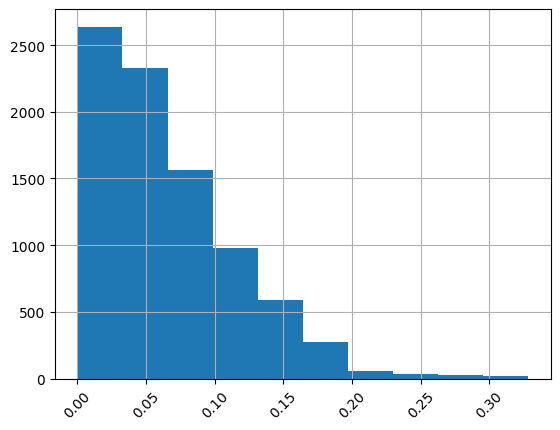

In [ ]:
df['Item_Visibility'].hist()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

* Boxplot de Item_Weight
En este grafico vemos la distribucion de los pesos de los Items, la cual tiene una mediana justo en la mitad de la media y sin Outliers, lo que nos dice que la muestra es bastante homogenea

<Axes: ylabel='Item_Weight'>

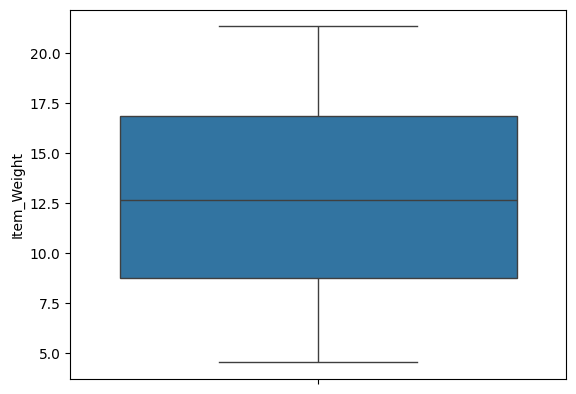

In [ ]:
sns.boxplot(y='Item_Weight', data=df)

* HeatMap
Existe casi nula correlacion entre las variables Numericas del Dataframe, excepto Item_MPR y Item_Outlet_Sales, que su correlacion es la mas alta entre ellas, pero sigue siendo un valor bajo.

<Axes: >

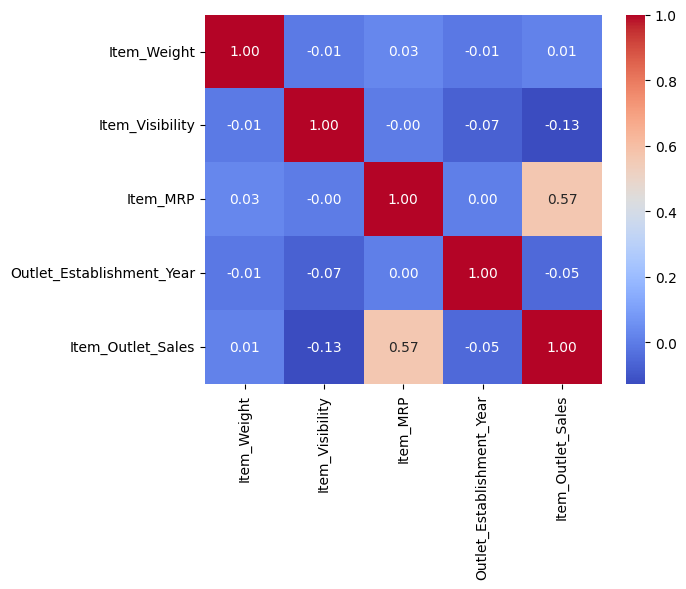

In [ ]:
#Columnas a correlacionar
columnas = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
dfcolumnas = df[columnas]
corr = dfcolumnas.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


##Nuevo Data Set y Librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

df2 = pd.read_csv(filename)

* Voy a cambair la columna Outlet_Size previo a la division X e y ya que es una columna ordinal y no deberia tener fuga de datos este cambio. NOTA: Solo cambiare los datos que ya existen, los nulos de la columna no los voy a tocar.

In [ ]:
cambios_outletsize = {"Small": 1, "Medium": 2, "High": 3}
df2["Outlet_Size"] = df2["Outlet_Size"].replace(cambios_outletsize)
y = df2["Item_Outlet_Sales"]
X = df2.drop("Item_Outlet_Sales", axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train["Outlet_Size"].value_counts()

(6392, 11)
(2131, 11)
(6392,)
(2131,)


Outlet_Size
2.0    2103
1.0    1788
3.0     689
Name: count, dtype: int64

In [ ]:
columnas_categoricas = X_train.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = X_train.select_dtypes(include=['number']).drop(columns=["Outlet_Size"]).columns.tolist()
columna_outlet = ["Outlet_Size"]


Voy a aplicar las estrategias para cada columna, excepto, para la columna Ordinal Outlet_Size que solo imputare los nulos con el valor mas frecuente

In [ ]:
categorico = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))

])

numerico = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
     ("scaler", StandardScaler())

])

OutletSize = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorico, columnas_categoricas),
        ('num', numerico, columnas_numericas),
        ('size', OutletSize, columna_outlet)
    ])

X_train_procesado = preprocessor.fit_transform(X_train)
X_train_procesado

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.        ,  0.        ,  0.        , ...,  1.82810922,
         1.32784893,  2.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.60336888,
         1.32784893,  2.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.24454056,
         0.13618724,  2.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.52302674,
         0.49368575,  2.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.38377708,
         1.0895166 ,  2.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.73836105,
        -0.10214509,  1.        ]])

In [ ]:
columnas_ohe = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(columnas_categoricas)

nombre_columnas = list(columnas_ohe) + columnas_numericas + columna_outlet

X_train_procesado_df = pd.DataFrame(X_train_procesado, columns=nombre_columnas)

X_train_procesado_df.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.817249,-0.712775,1.828109,1.327849,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.556340,-1.291052,0.603369,1.327849,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.131512,1.813319,0.244541,0.136187,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.169219,-1.004931,-0.952591,0.732018,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.528819,-0.965484,-0.336460,0.493686,2.0


In [ ]:
print(nombre_columnas)
X_train_procesado.shape
type(nombre_columnas)
len(nombre_columnas)


['Item_Identifier_DRA12', 'Item_Identifier_DRA24', 'Item_Identifier_DRA59', 'Item_Identifier_DRB01', 'Item_Identifier_DRB13', 'Item_Identifier_DRB24', 'Item_Identifier_DRB25', 'Item_Identifier_DRB48', 'Item_Identifier_DRC01', 'Item_Identifier_DRC12', 'Item_Identifier_DRC13', 'Item_Identifier_DRC25', 'Item_Identifier_DRC27', 'Item_Identifier_DRC36', 'Item_Identifier_DRC49', 'Item_Identifier_DRD01', 'Item_Identifier_DRD12', 'Item_Identifier_DRD13', 'Item_Identifier_DRD15', 'Item_Identifier_DRD24', 'Item_Identifier_DRD25', 'Item_Identifier_DRD27', 'Item_Identifier_DRD37', 'Item_Identifier_DRD49', 'Item_Identifier_DRD60', 'Item_Identifier_DRE01', 'Item_Identifier_DRE03', 'Item_Identifier_DRE12', 'Item_Identifier_DRE13', 'Item_Identifier_DRE15', 'Item_Identifier_DRE25', 'Item_Identifier_DRE27', 'Item_Identifier_DRE37', 'Item_Identifier_DRE48', 'Item_Identifier_DRE49', 'Item_Identifier_DRE60', 'Item_Identifier_DRF01', 'Item_Identifier_DRF03', 'Item_Identifier_DRF13', 'Item_Identifier_DRF15',

1593

In [ ]:
X_train_procesado
type(nombre_columnas)

list